In [34]:
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import MinMaxScaler

# Load data
content = []
with open('Final.csv', 'r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        content.append(row)

# Convert to DataFrame
df = pd.DataFrame(content)

# Replace commas and convert to numeric
numeric_columns = ['InPlayPassesThatLeadToShotAttempt', 'SetpiecesLeadingToShotAttempt', 'FoulsDrawnLeadingToShotAttempt', 'SuccessfulTakeOnsLeadingToShotAttempt', 'ShotCreatingActionsPer90Min',
                    'GoalCreationAccuracy', 'InPlayPassesLeadingToGoal', 'SetpiecesLeadingToGoal', 'ShotsAttemptLeadingToGoal',
                    'TacklesAttempted', 'TackleWon', 'TacklesinDef3rd', 'TacklesinMid3rd', 'TacklesinAtt3rd', 'DribblesWinningPerc','PassesBlocked','Tackles+Interception','Clearances','Goals','Shots','ShotsOnTarget%','Goals/ShotOnTarget'
                  ,'Goals/Shot','NonPenaltyGoals-NonPenaltyXG','Goals-XG','TacklesWon','TouchesInDefensivePenaltyArea','TouchesInDefensive1/3rd','TouchesInMid1/3rd','TouchesInAtt1/3rd','TouchesInAttackingPenaltyArea','PassesBlocked'
                  , 'SucessfulTakeOns%', 'TimesTackledByADefDuringTakeOn%', 'NumberOfCarries', 'DistanceTravelledInCarries(Yards)', 'DistanceTravelledInCarries(Yards)TowardsOpponentGoal', 'CarriesThatReachesCloseToOpponentGoal(DistTravelled>10Yards)', 'CarriesInFinalThird', 'CarriesInPenaltyArea', 'ShortPassesCompleted%', 'NonPenaltyExpectedGoals', 'TotalPassingDistance' 
                  , 'ShortPassesCompleted%', 'ShortPassesCompleted', 'MediumPassesCompleted', 'PassesIntoPenaltyArea', 'LongPassesAttempted', 'LongPassesCompleted%', 'Crosses', 'FoulsCommited', 'FoulsDrawn', 'Interceptions', 'BallsRecovered', 'AerialDuelWon', 'AerialDuelWinningPercentage', 'InGamePasses',
                  'PassesCompleted', 'ThroughBalls', 'SetPiecesPasses', 'Switches', 'Crosses', 'CornersTaken', 'InswingingCorners', 'OutswingingCorners', 'TimesTackledByADefDuringTakeOn%', 'AverageShotDistance']
# First ensure numeric_columns only contains columns present in the DataFrame
numeric_columns = [col for col in numeric_columns if col in df.columns]

# Apply regex replacement and convert columns to numeric, but operate row by row to avoid issues with missing columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace({',': ''}, regex=True), errors='coerce')

# This will print out the columns that were converted to numeric
print("Successfully converted columns:", numeric_columns)


Successfully converted columns: ['InPlayPassesThatLeadToShotAttempt', 'SetpiecesLeadingToShotAttempt', 'FoulsDrawnLeadingToShotAttempt', 'SuccessfulTakeOnsLeadingToShotAttempt', 'ShotCreatingActionsPer90Min', 'GoalCreationAccuracy', 'InPlayPassesLeadingToGoal', 'SetpiecesLeadingToGoal', 'ShotsAttemptLeadingToGoal', 'TacklesAttempted', 'TackleWon', 'TacklesinDef3rd', 'TacklesinMid3rd', 'TacklesinAtt3rd', 'DribblesWinningPerc', 'PassesBlocked', 'Tackles+Interception', 'Clearances', 'Goals', 'Shots', 'ShotsOnTarget%', 'Goals/ShotOnTarget', 'Goals/Shot', 'NonPenaltyGoals-NonPenaltyXG', 'Goals-XG', 'TacklesWon', 'TouchesInDefensivePenaltyArea', 'TouchesInDefensive1/3rd', 'TouchesInMid1/3rd', 'TouchesInAtt1/3rd', 'TouchesInAttackingPenaltyArea', 'PassesBlocked', 'SucessfulTakeOns%', 'TimesTackledByADefDuringTakeOn%', 'NumberOfCarries', 'DistanceTravelledInCarries(Yards)', 'DistanceTravelledInCarries(Yards)TowardsOpponentGoal', 'CarriesThatReachesCloseToOpponentGoal(DistTravelled>10Yards)', '

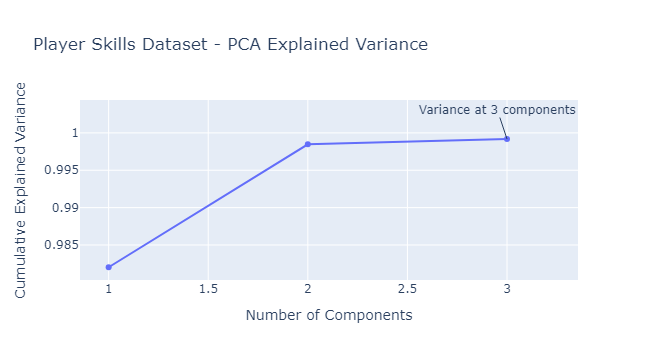

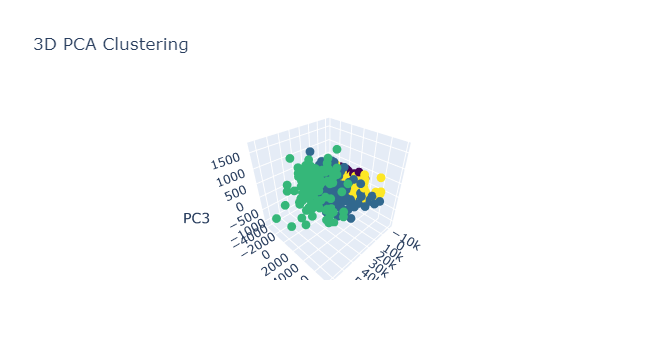

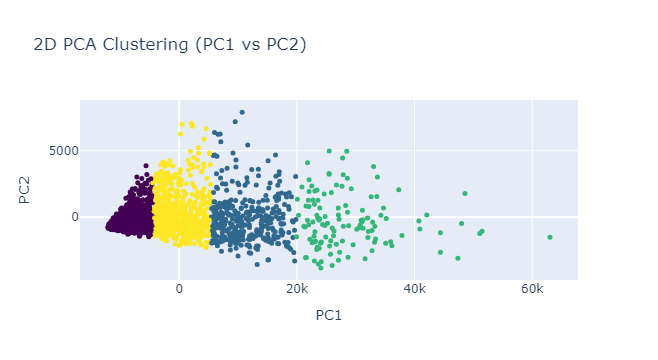

In [44]:
# Create a copy of the filtered DataFrame
filtered_df_copy = df.copy()

# Define the feature list
features = ['InPlayPassesThatLeadToShotAttempt', 'SetpiecesLeadingToShotAttempt', 'FoulsDrawnLeadingToShotAttempt', 
            'SuccessfulTakeOnsLeadingToShotAttempt', 'ShotCreatingActionsPer90Min', 'GoalCreationAccuracy', 
            'InPlayPassesLeadingToGoal', 'SetpiecesLeadingToGoal', 'ShotsAttemptLeadingToGoal', 'TacklesAttempted', 
            'TackleWon', 'TacklesinDef3rd', 'TacklesinMid3rd', 'TacklesinAtt3rd', 'DribblesWinningPerc', 'PassesBlocked', 
            'Tackles+Interception', 'Clearances', 'Goals', 'Shots', 'ShotsOnTarget%', 'Goals/ShotOnTarget', 'Goals/Shot', 
            'NonPenaltyGoals-NonPenaltyXG', 'Goals-XG', 'TacklesWon', 'TouchesInDefensivePenaltyArea', 
            'TouchesInDefensive1/3rd', 'TouchesInMid1/3rd', 'TouchesInAtt1/3rd', 'TouchesInAttackingPenaltyArea', 
            'PassesBlocked', 'SucessfulTakeOns%', 'TimesTackledByADefDuringTakeOn%', 'NumberOfCarries', 
            'DistanceTravelledInCarries(Yards)', 'DistanceTravelledInCarries(Yards)TowardsOpponentGoal', 
            'CarriesThatReachesCloseToOpponentGoal(DistTravelled>10Yards)', 'CarriesInFinalThird', 'CarriesInPenaltyArea', 
            'ShortPassesCompleted%', 'NonPenaltyExpectedGoals', 'TotalPassingDistance', 'ShortPassesCompleted%', 
            'ShortPassesCompleted', 'MediumPassesCompleted', 'PassesIntoPenaltyArea', 'LongPassesAttempted', 
            'LongPassesCompleted%', 'Crosses', 'FoulsCommited', 'FoulsDrawn', 'Interceptions', 'BallsRecovered', 
            'AerialDuelWon', 'AerialDuelWinningPercentage', 'InGamePasses', 'PassesCompleted', 'ThroughBalls', 
            'SetPiecesPasses', 'Switches', 'Crosses', 'CornersTaken', 'InswingingCorners', 'OutswingingCorners', 
            'TimesTackledByADefDuringTakeOn%', 'AverageShotDistance']

# Use the filtered copy of the DataFrame and include player names
dfskills = filtered_df_copy[features].copy()
dfskills['Player'] = filtered_df_copy['Player Name']  # Include player names
dfskills['Club'] = filtered_df_copy['Club Name']  # Include Club names
dfskills['Position'] = filtered_df_copy['Position']  # Include Position

# Drop rows with NaN values in the features
dfskills_clean = dfskills.dropna(subset=features)

# Perform PCA on the cleaned dataset
# Perform PCA on the cleaned dataset, limiting to 3 components
pca = PCA(n_components=3).fit(dfskills_clean[features])

# Get explained variance ratio
pcaratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
trace = go.Scatter(x=np.arange(len(pcaratio)) + 1, y=np.cumsum(pcaratio), mode='lines+markers')
data = [trace]
layout = dict(title="Player Skills Dataset - PCA Explained Variance", 
              xaxis_title="Number of Components", 
              yaxis_title="Cumulative Explained Variance",
              annotations=[dict(x=3, y=np.cumsum(pcaratio)[2], text="Variance at 3 components", showarrow=True)])
fig = dict(data=data, layout=layout)
pyo.iplot(fig)

# Transform the data to PCA space with 3 components
dfskillsPCA = pd.DataFrame(pca.transform(dfskills_clean[features]), columns=['PC1', 'PC2', 'PC3'])
dfskillsPCA['Player'] = dfskills_clean['Player']

# Perform clustering (you can use k-means or any other clustering algorithm)
kmeans = KMeans(n_clusters=4).fit(dfskillsPCA[['PC1', 'PC2', 'PC3']])
dfskillsPCA['cluster'] = kmeans.labels_

# 3D PCA plot with clusters
trace_3d = go.Scatter3d(
    x=dfskillsPCA['PC1'], y=dfskillsPCA['PC2'], z=dfskillsPCA['PC3'], 
    mode='markers', 
    marker=dict(color=dfskillsPCA['cluster'], colorscale='Viridis', size=5),
    text=dfskillsPCA['Player']
)
layout_3d = go.Layout(title="3D PCA Clustering", 
                      scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig_3d = go.Figure(data=[trace_3d], layout=layout_3d)
pyo.iplot(fig_3d)
# 2D PCA plot with clusters using PC1 and PC2
trace_2d = go.Scatter(
    x=dfskillsPCA['PC1'], y=dfskillsPCA['PC2'], 
    mode='markers', 
    marker=dict(color=dfskillsPCA['cluster'], colorscale='Viridis', size=5),
    text=dfskillsPCA['Player']
)
layout_2d = go.Layout(title="2D PCA Clustering (PC1 vs PC2)", 
                      xaxis_title='PC1', 
                      yaxis_title='PC2')
fig_2d = go.Figure(data=[trace_2d], layout=layout_2d)
pyo.iplot(fig_2d)


In [45]:
# print(filtered_df_copy.isnull().sum())  # Check the number of NaNs per column
# print(filtered_df_copy[filtered_df_copy.isnull().any(axis=1)])  # Show rows with NaN
print(filtered_df_copy.dtypes)  # Check data types of each column


Player Name                        object
Club Name                          object
FoulsDrawnLeadingToShotAttempt    float64
Position                           object
FoulsDrawnLeadingToGoal            object
                                   ...   
InswingingCorners                 float64
OutswingingCorners                float64
StraightCorners                    object
PassesCompleted                   float64
PassesOffside                      object
Length: 111, dtype: object


In [46]:
# Strip column names
filtered_df_copy.columns = filtered_df_copy.columns.str.strip()

# Apply strip to values only in columns of type 'object'
for col in filtered_df_copy.select_dtypes(include=['object']).columns:
    filtered_df_copy[col] = filtered_df_copy[col].map(lambda x: x.strip() if isinstance(x, str) else x)
# print(filtered_df_copy.duplicated().sum())  # Check for duplicate rows
print(filtered_df_copy.shape)  # Check if rows remain after previous filtering


(2989, 111)


In [61]:
# Drop rows with missing values
dfskills_dropped = dfskills.dropna(subset=features)

# Apply PCA with 5 components
pca = PCA(n_components=5)
skillsPCA = pca.fit_transform(dfskills_dropped[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

# Create DataFrame for PCA and KMeans
dfskillsPCA = pd.DataFrame(skillsPCA, columns=[f'PC{i+1}' for i in range(skillsPCA.shape[1])])
dfskillsPCA['cluster'] = skillsPCA_labels
dfskillsPCA['Player'] = dfskills_dropped['Player']

# Apply t-SNE
Xtsne = TSNE(n_components=2).fit_transform(dfskillsPCA.drop(['cluster', 'Player'], axis=1))
dftsne = pd.DataFrame(Xtsne, columns=['x1', 'x2'])
dftsne['cluster'] = dfskillsPCA['cluster']


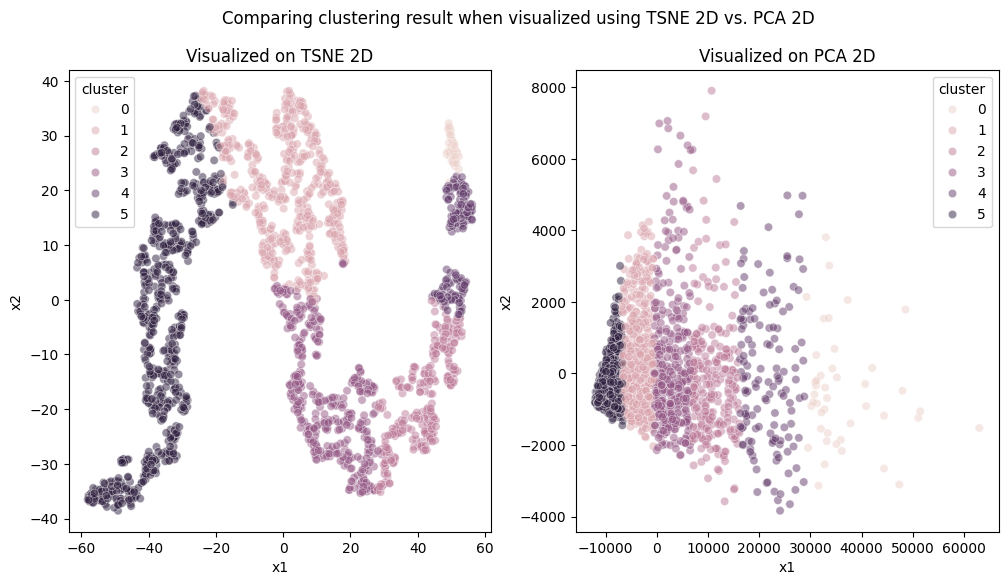

In [62]:
# Apply t-SNE
Xtsne = TSNE(n_components=2).fit_transform(dfskillsPCA.drop(['cluster', 'Player'], axis=1))
dftsne = pd.DataFrame(Xtsne, columns=['x1', 'x2'])
dftsne['cluster'] = dfskillsPCA['cluster']

dfskills_clean = dfskills[features].dropna()

# Apply PCA for 2D visualization
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(dfskills_clean)  # Already cleaned DataFrame
dfskillsPCA2 = pd.DataFrame(skillsPCA2, columns=['x1', 'x2'])
dfskillsPCA2['cluster'] = dfskillsPCA['cluster']  # Assuming 'cluster' is from the PCA clustering result

# Visualize using TSNE and PCA
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# TSNE Plot
sns.scatterplot(data=dftsne, x='x1', y='x2', hue='cluster', legend="full", alpha=0.5, ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')

# PCA Plot
sns.scatterplot(data=dfskillsPCA2, x='x1', y='x2', hue='cluster', legend="full", alpha=0.5, ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')

fig.suptitle('Comparing clustering result when visualized using TSNE 2D vs. PCA 2D')
plt.show()


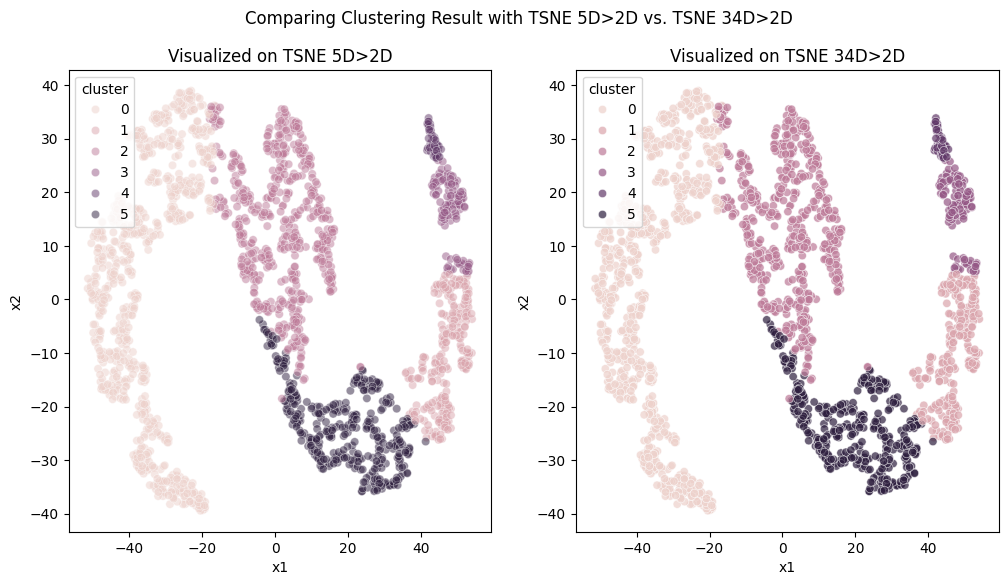

In [49]:
# Drop rows with missing values for clustering
df_cleaned = dfskills.dropna(subset=features).copy()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=6)
clustering_ori = kmeans.fit_predict(df_cleaned[features])
df_cleaned['cluster'] = clustering_ori

# TSNE transformation for 5D features
Xtsne5D = TSNE(n_components=2).fit_transform(df_cleaned[features])
dftsne5D = pd.DataFrame(Xtsne5D, columns=['x1', 'x2'])
dftsne5D['cluster'] = clustering_ori

# TSNE transformation for 34D features (if available)
# Replace df_cleaned_34D with the actual DataFrame containing 34D features
# df_cleaned_34D = dfskills.dropna(subset=features_34D).copy()  # Ensure working with 34D features
# Xtsne34D = TSNE(n_components=2).fit_transform(df_cleaned_34D[features_34D])
# dftsne34D = pd.DataFrame(Xtsne34D, columns=['x1', 'x2'])
# dftsne34D['cluster'] = clustering_ori

# Use the same transformed data for 34D if not defined
dftsne34D = dftsne5D.copy()  # Replace with actual 34D t-SNE result if available

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Visualize TSNE 5D>2D
sns.scatterplot(data=dftsne5D, x='x1', y='x2', hue='cluster', legend="full", alpha=0.5, ax=ax[0])
ax[0].set_title('Visualized on TSNE 5D>2D')

# Visualize TSNE 34D>2D
sns.scatterplot(data=dftsne34D, x='x1', y='x2', hue='cluster', legend="full", alpha=0.7, ax=ax[1])
ax[1].set_title('Visualized on TSNE 34D>2D')

fig.suptitle('Comparing Clustering Result with TSNE 5D>2D vs. TSNE 34D>2D')
plt.show()

In [63]:
# Assuming dfskills contains the original DataFrame with 'Player', 'Club', and 'Position' columns
# and features contains the list of feature columns to be used for clustering

# Remove duplicates from features list
features = list(set(features))

# Check columns in dfskills and remove duplicates
dfskills = dfskills.loc[:, ~dfskills.columns.duplicated()]

# Verify if all features are present in dfskills
missing_features = [f for f in features if f not in dfskills.columns]
if missing_features:
    raise ValueError(f"Missing columns in dfskills: {missing_features}")

# # Print columns to debug the issue
# print("Columns in dfskills:", dfskills.columns.tolist())

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature columns
scaled_features = scaler.fit_transform(dfskills[features])

# Create DataFrame for scaled features with correct number of columns
scaled_columns = [f'Scaled_{col}' for col in features]
dfskills_scaled = pd.DataFrame(scaled_features, columns=scaled_columns, index=dfskills.index)

# Copy non-feature columns from original DataFrame
dfskills_scaled['Player'] = dfskills['Player']
dfskills_scaled['Club'] = dfskills['Club']
dfskills_scaled['Position'] = dfskills['Position']
dfskills_scaled['Cluster'] = dfskillsPCA['cluster']

# Get top 50 players per cluster
top_50_players = {}
for cluster in dfskills_scaled['Cluster'].unique():
    cluster_df = dfskills_scaled[dfskills_scaled['Cluster'] == cluster].copy()
    cluster_df['Sum'] = cluster_df[[f'Scaled_{col}' for col in features]].sum(axis=1)
    top_50 = cluster_df.nlargest(50, 'Sum')
    top_50_players[cluster] = top_50

    # Save each cluster's top 50 players
    top_50.to_csv(f'top_50_players_cluster_{cluster}.csv', index=False)

# Combine all top 50 players from each cluster into one DataFrame
combined_top_100 = pd.concat(top_50_players.values()).nlargest(100, 'Sum')
combined_top_100.to_csv('top_100_players_combined.csv', index=False)

# Print the head of each top 50 players DataFrame
for cluster, top_50 in top_50_players.items():
    print(f"Top 50 players for Cluster {cluster}:")
    print(top_50.head())

# Print the head of the combined top 100 players DataFrame
print("Combined Top 100 Players:")
print(combined_top_100.head())

Top 50 players for Cluster 0.0:
     Scaled_FoulsDrawnLeadingToShotAttempt  Scaled_DribblesWinningPerc  \
0                                 0.157895                       0.390   
140                               0.105263                       0.317   
476                               0.000000                       0.634   
3                                 0.052632                       0.657   
2                                 0.000000                       0.409   

     Scaled_CarriesThatReachesCloseToOpponentGoal(DistTravelled>10Yards)  \
0                                             0.324219                     
140                                           0.246094                     
476                                           0.093750                     
3                                             0.257812                     
2                                             0.070312                     

     Scaled_TouchesInAtt1/3rd  Scaled_ShotCreatingActionsPer90Min 

In [12]:
# Function to handle rows outside the limits of mean ± sensitivity * std_dev for numeric columns
def outside_limit(df, label_col, label, sensitivity):
    # Filter by the specific label
    df_label = df[df[label_col] == label]
    
    # Select numeric and non-numeric columns
    numeric_cols = df_label.select_dtypes(include=['number']).columns
    non_numeric_cols = df_label.select_dtypes(exclude=['number']).columns

    print(f"Label: {label}, Numeric columns: {numeric_cols}")
    
    mean_df_list = []

    for varname in numeric_cols:
        if varname not in df_label.columns:
            print(f"Column {varname} does not exist in the DataFrame.")
            continue

        mean_val = df[varname].mean()
        std_dev = df[varname].std()
        lower_limit = mean_val - sensitivity * std_dev
        upper_limit = mean_val + sensitivity * std_dev

        print(f"Processing {varname}: Mean = {mean_val}, Std = {std_dev}, Limits = ({lower_limit}, {upper_limit})")

        df_label_var = df_label[[varname] + list(non_numeric_cols)]

        # Filtering rows outside the defined limits
        filtered_df = df_label_var[(df_label_var[varname] < lower_limit) | 
                                   (df_label_var[varname] > upper_limit)]
        
        print(f"Filtered DataFrame for {varname} (label {label}):\n", filtered_df.head())
        mean_df_list.append(filtered_df)

    # Concatenate filtered data for all numeric columns
    mean_df = pd.concat(mean_df_list, axis=0)
    return mean_df

In [11]:
print(df_cleaned.head())
print(df_cleaned.columns)

   InPlayPassesThatLeadToShotAttempt  SetpiecesLeadingToShotAttempt  \
0                              156.0                            2.0   
1                              115.0                           40.0   
2                               25.0                            0.0   
3                               49.0                            1.0   
4                              182.0                           11.0   

   FoulsDrawnLeadingToShotAttempt  SuccessfulTakeOnsLeadingToShotAttempt  \
0                             3.0                                    2.0   
1                             3.0                                    7.0   
2                             0.0                                    0.0   
3                             1.0                                    0.0   
4                             9.0                                   16.0   

   ShotCreatingActionsPer90Min  GoalCreationAccuracy  \
0                         4.15                  0.44   
1   

In [13]:
# Function to plot bar charts for features that are outside the limits
def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
    mean_df = outside_limit(df, label_col, label, sensitivity)
    
    if mean_df.empty:
        ax.set_title(f'Cluster {label} - No Data')
        return
    
    numeric_cols = mean_df.select_dtypes(include=[np.number]).columns

    for varname in numeric_cols:
        ax.bar(mean_df.index, mean_df[varname], label=varname)
        
        # Annotate player names if they exist
        if 'Player' in mean_df.columns:
            for idx, (value, player) in enumerate(zip(mean_df[varname], mean_df['Player'])):
                if np.isfinite(value):
                    ax.text(idx, value, player, ha='center', va='bottom', fontsize=8)

    ax.set_title(f'Cluster {label}')
    ax.set_ylabel('Values')
    ax.legend(loc='best')

In [14]:
# Function to plot features for all clusters
def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    fig, axes = plt.subplots(n_clusters, 1, figsize=(10, 5 * n_clusters), sharex=True)
    
    # Ensure axes are iterable
    if n_clusters == 1:
        axes = [axes]

    # Check for duplicate columns and rename them
    df = df.loc[:, ~df.columns.duplicated()].copy()
    print(f"Columns after removing duplicates:\n{df.columns}")
    
    for i in range(n_clusters):
        plot_barchart_all_unique_features(df, label_col, i, axes[i], sensitivity)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Call the plot function with the cleaned DataFrame
plot_features_all_cluster(df=df_cleaned, label_col='cluster', n_clusters=6, sensitivity=0.2)

Columns after removing duplicates:
Index(['InPlayPassesThatLeadToShotAttempt', 'SetpiecesLeadingToShotAttempt',
       'FoulsDrawnLeadingToShotAttempt',
       'SuccessfulTakeOnsLeadingToShotAttempt', 'ShotCreatingActionsPer90Min',
       'GoalCreationAccuracy', 'InPlayPassesLeadingToGoal',
       'SetpiecesLeadingToGoal', 'ShotsAttemptLeadingToGoal',
       'TacklesAttempted', 'TackleWon', 'TacklesinDef3rd', 'TacklesinMid3rd',
       'TacklesinAtt3rd', 'DribblesWinningPerc', 'PassesBlocked',
       'Tackles+Interception', 'Clearances', 'Goals', 'Shots',
       'ShotsOnTarget%', 'Goals/ShotOnTarget', 'Goals/Shot',
       'NonPenaltyGoals-NonPenaltyXG', 'Goals-XG', 'Miscontrols',
       'TouchesInDefensivePenaltyArea', 'TouchesInDefensive1/3rd',
       'TouchesInMid1/3rd', 'TouchesInAtt1/3rd',
       'TouchesInAttackingPenaltyArea', 'SucessfulTakeOns%',
       'TimesTackledByADefDuringTakeOn%', 'NumberOfCarries',
       'DistanceTravelledInCarries(Yards)',
       'DistanceTravelledInCar

In [18]:

# Add player details (assuming these columns exist in the original DataFrame)
dfskills['Player'] = filtered_df_copy['Player Name']
dfskills['Club'] = filtered_df_copy['Club Name']
dfskills['Position'] = filtered_df_copy['Position']

# Add cluster labels to the original DataFrame
dfskills['Cluster'] = df_cleaned['cluster']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature columns
scaled_features = scaler.fit_transform(dfskills[features])

# Add scaled features to the DataFrame
dfskills_scaled = pd.DataFrame(scaled_features, columns=[f'Scaled_{col}' for col in features])
dfskills_scaled['Player'] = dfskills['Player']
dfskills_scaled['Club'] = dfskills['Club']
dfskills_scaled['Position'] = dfskills['Position']
dfskills_scaled['Cluster'] = dfskills['Cluster']

# Get top 50 players per cluster
top_50_players = {}
for cluster in dfskills_scaled['Cluster'].unique():
    cluster_df = dfskills_scaled[dfskills_scaled['Cluster'] == cluster]
    cluster_df['Sum'] = cluster_df[[f'Scaled_{col}' for col in features]].sum(axis=1)
    top_50 = cluster_df.nlargest(50, 'Sum')
    top_50_players[cluster] = top_50

    # Save each cluster's top 50 players to a CSV
    top_50_file = f'top_50_cluster_{cluster}.csv'
    top_50.to_csv(top_50_file, index=False)

    # Print the head of the CSV file
    print(f'Head of {top_50_file}:')
    print(top_50.head(), '\n')

# Combine all data to find top 100 players based on aggregate score
all_top_players = pd.concat(top_50_players.values())

# Aggregate score by player across all clusters
aggregate_scores = all_top_players.groupby(['Player', 'Club', 'Position'])['Sum'].sum().reset_index()
top_100_combined = aggregate_scores.nlargest(100, 'Sum')

# Save combined top 100 players to a CSV
top_100_file = 'top_100_combined.csv'
top_100_combined.to_csv(top_100_file, index=False)

# Print the head of the combined CSV file
print(f'Head of {top_100_file}:')
print(top_100_combined.head())


NameError: name 'df_cleaned' is not defined